In [2]:
import numpy as np
from sklearn.svm import SVC

X1 = [[1,3], [3,3], [4,0], [3,0], [2, 2]]
y1 = [1, 1, 1, 1, 1]
X2 = [[0,0], [1,1], [1,2], [2,0]]
y2 = [-1, -1, -1, -1]
X = np.array(X1 + X2)
y = y1 + y2

clf = SVC(kernel='linear', C=1E10)
clf.fit(X, y)
print(clf.support_vectors_)

[[1. 2.]
 [1. 3.]
 [3. 0.]]


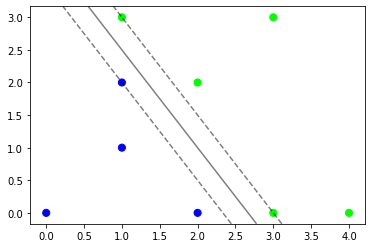

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_svc_decision_function(clf, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = clf.decision_function(xy).reshape(X.shape)

    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(clf.support_vectors_[:, 0],
                   clf.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)


plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='brg');
plot_svc_decision_function(clf)
plt.show()

## Điều chỉnh tham số C

## Tối ưu tham số C

In [6]:
from sklearn.model_selection import GridSearchCV

parameter_candidates = [
  {'C': [0.001, 0.01, 0.1, 1, 5, 10, 100, 1000], 'kernel': ['linear']},
]

clf = GridSearchCV(estimator=SVC(), param_grid=parameter_candidates, n_jobs=-1)
clf.fit(X, y)
print('Best score:', clf.best_score_)
print('Best C:',clf.best_estimator_.C)

c:\users\naomi\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best score: 0.7777777777777778
Best C: 1


c:\users\naomi\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
